In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouseData_df = pd.DataFrame(mouse_metadata)
studyResults_df = pd.DataFrame(study_results)

fullData_df = pd.merge(mouseData_df,studyResults_df, on="Mouse ID", how="outer")
# fullData_df


# Checking the number of mice.
miceCount = len(fullData_df["Mouse ID"].unique())
# miceCount


# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
columns_to_check = ["Mouse ID", "Timepoint"]
duplicateData_df = fullData_df.loc[fullData_df[columns_to_check].duplicated()]  ## Duplicate data for mouse ID
# duplicateData_df


# Create a clean DataFrame by dropping the duplicate mouse by its ID.
IDS = []

for ID in duplicateData_df["Mouse ID"]:
    if ID not in IDS:
        IDS.append(ID)
    
indexedData_df = fullData_df.set_index("Mouse ID") ##
cleanData_df = indexedData_df.drop(IDS).reset_index()
# cleanData_df.loc[cleanData_df["Mouse ID"]=="g989", :]


# Checking the number of mice in the clean DataFrame.
cleanCount = len(cleanData_df["Mouse ID"].unique())
# cleanCount
print()
print(f'The full data contains {miceCount} specimens.')
print(f'The cleaned data contains {cleanCount} specimens with {len(IDS)} error(s) removed.')



The full data contains 249 specimens.
The cleaned data contains 248 specimens with 1 error(s) removed.


# Summary Statistics

In [2]:
meanTV = cleanData_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
medianTV = cleanData_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
varTV = cleanData_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
stdTV = cleanData_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
semTV = cleanData_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()

merge1 = pd.merge(meanTV, medianTV, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume" ,
                                                                       "Tumor Volume (mm3)_y":"Median Tumor Volume"})
merge1

merge2 = pd.merge(varTV, stdTV, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Variance" ,
                                                                       "Tumor Volume (mm3)_y":"Tumor Volume Std. Dev."})
merge2

merge3 = pd.merge(merge1, merge2, on="Drug Regimen")
merge3

summaryTV_df = pd.merge(merge3, semTV, on="Drug Regimen").rename(columns={"Tumor Volume (mm3)":"Tumor Volume Std. Err."})
summaryTV_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [3]:
tests = ['mean','median','var','std','sem']
cleanData_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").agg({'Tumor Volume (mm3)':tests})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts

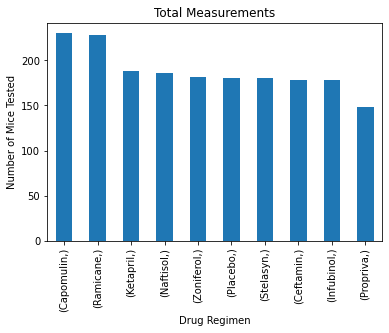

<Figure size 432x288 with 0 Axes>

In [4]:
timePoints_df = cleanData_df[["Drug Regimen"]].value_counts()

timePoints_df.plot(kind="bar")
plt.title("Total Measurements")
plt.ylabel("Number of Mice Tested")
plt.show()
plt.tight_layout()

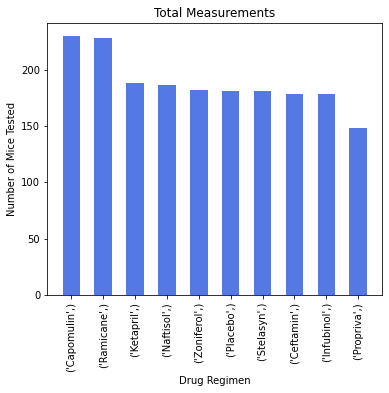

<Figure size 432x288 with 0 Axes>

In [5]:
drugList = list(timePoints_df.index)
tpCount = list(timePoints_df)

timePoints = tpCount
x_axis = np.arange(len(timePoints_df.index))

plt.figure(figsize=(6,5))
plt.bar(x_axis, timePoints, width=.55,alpha=.9, color='royalblue', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugList, rotation="vertical")

plt.title("Total Measurements")
plt.ylabel("Number of Mice Tested")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

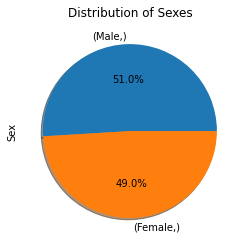

<Figure size 432x288 with 0 Axes>

In [6]:
sexList_df = cleanData_df[["Sex"]].value_counts()

sexList_df.plot(kind="pie", ylabel ="Sex", autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Sexes")
plt.show()
plt.tight_layout()

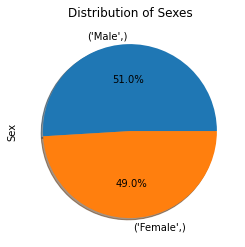

<Figure size 432x288 with 0 Axes>

In [7]:
labels = sexList_df.index
sizes = sexList_df

colors=["tab:blue", "tab:orange"]
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title("Distribution of Sexes")
plt.ylabel("Sex")
plt.show()
plt.tight_layout()

# Quartiles, Outliers and Boxplots

In [52]:
cleanData_df.groupby("Drug Regimen").max()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,y793,Male,24,25,45,48.158209,3
Ceftamin,y865,Male,24,30,45,68.923185,4
Infubinol,z581,Male,24,30,45,72.226731,4
Ketapril,y260,Male,24,30,45,78.567014,4
Naftisol,z969,Male,23,30,45,76.668817,4
Placebo,y478,Male,21,30,45,73.212939,4
Propriva,z435,Male,24,30,45,72.455421,4
Ramicane,z578,Male,23,25,45,47.622816,3
Stelasyn,z314,Male,23,30,45,75.123690,4


In [70]:
# Start by getting the last (greatest) timepoint for each mouse
# Put treatments into a list for for loop (and later for plot labels)

regimenRequest = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

maxTP_df = cleanData_df[["Mouse ID","Timepoint","Drug Regimen","Tumor Volume (mm3)"]].groupby(["Drug Regimen","Mouse ID"]).max()
# maxTP_df

# maxTP_df.loc[regimenRequest, :].head(50)
volumeLTP = maxTP_df.loc[regimenRequest, :]
volumeLTP


Timepoint  Tumor Volume (mm3)
Drug Regimen Mouse ID                               
Capomulin    b128             45           45.651331
             b742             45           45.000000
             f966             20           45.000000
             g288             45           46.304003
             g316             45           46.809225
...                          ...                 ...
Ceftamin     x226              0           45.000000
             x581             45           64.634949
             x822             45           61.386660
             y769             45           68.594745
             y865             45           64.729837

[100 rows x 2 columns]

In [10]:
# Create empty list to fill with tumor vol data (for plotting)

# Capomulin data
capCheck = volumeLTP.index.get_level_values(0)=="Capomulin"
capFTV = list(volumeLTP[capCheck]["Tumor Volume (mm3)"])
# capFTV
capFTP = list(volumeLTP[capCheck]["Timepoint"])
# capFTP

cap_df = pd.DataFrame(volumeLTP[capCheck].reset_index())


# Ramicane data
ramCheck = volumeLTP.index.get_level_values(0)=="Ramicane"
ramFTV = list(volumeLTP[ramCheck]["Tumor Volume (mm3)"])
# ramFTV
ramFTP = list(volumeLTP[ramCheck]["Timepoint"])
# ramFTP

ram_df = pd.DataFrame(volumeLTP[ramCheck].reset_index())


# Infubinol data
infCheck = volumeLTP.index.get_level_values(0)=="Infubinol"
infFTV =volumeLTP[infCheck]["Tumor Volume (mm3)"]
# infFTV
infFTP = list(volumeLTP[infCheck]["Timepoint"])
# infFTP

inf_df = pd.DataFrame(volumeLTP[infCheck].reset_index())


# Ceftamin data
cefCheck = volumeLTP.index.get_level_values(0)=="Ceftamin"
cefFTV = list(volumeLTP[cefCheck]["Tumor Volume (mm3)"])
# cefFTV
cefFTP = list(volumeLTP[cefCheck]["Timepoint"])
# cefFTP

cef_df = pd.DataFrame(volumeLTP[cefCheck].reset_index())
# cef_df["Timepoint"]



In [71]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Capomulin calculations
capVolumes = ram_df["Tumor Volume (mm3)"]

quartilesCap = capVolumes.quantile([.25,.5,.75])
lowerqCap = quartilesCap[0.25]
upperqCap = quartilesCap[0.75]
iqrCap = upperqCap-lowerqCap

lbCap = lowerqCap - (1.5*iqrCap)
ubCap = upperqCap + (1.5*iqrCap)

outlierCap= []
for x in capVolumes:
    if (x>ubCap)|(x<lbCap):
        outlierCap.append(x)

print(f"Campomulin's IQR and Potential Outliers:")
print(f"     The IQR of Campomulin is: {iqrCap}")
print(f"     Potentential outliers: {len(outlierCap)} {outlierCap}")
print()
# print(f"{lbCap} {ubCap}")
# print(list(capVolumes))


# Ramicane calculations
ramVolumes = ram_df["Tumor Volume (mm3)"]

quartilesR = ramVolumes.quantile([.25,.5,.75])
lowerqR = quartilesR[0.25]
upperqR = quartilesR[0.75]
iqrR = upperqR-lowerqR

print(quartilesR)
print(lowerqR)
print(upperqR)
print(iqrR)

lower_boundR = lowerqR - (1.5*iqrR)
upper_boundR = upperqR + (1.5*iqrR)

outlierRam= []
for x in ramVolumes:
    if (x>upper_boundR)|(x<lower_boundR):
        outlierRam.append(x)
        
print(f"Ramicane's IQR and Potential Outliers:")
print(f"     The IQR of Ramicane is: {iqrR}")
print(f"     Potentential outliers: {len(outlierRam)} {outlierRam}")
print()
# print(f"{lower_boundR} {upper_boundR}")
# print(list(ramVolumes))


# Infubinol calculations
infVolumes = inf_df["Tumor Volume (mm3)"]

quartilesI = infVolumes.quantile([.25,.5,.75])
lowerqI = quartilesI[0.25]
upperqI = quartilesI[0.75]
iqrI = upperqI-lowerqI

lower_boundI = lowerqI - (1.5*iqrI)
upper_boundI = upperqI + (1.5*iqrI)

outlierInf= []
for x in infVolumes:
    if (x>upper_boundI)|(x<lower_boundI):
        outlierInf.append(x)
        
print(f"Infubinol's IQR and Potential Outliers:")
print(f"     The IQR of Infubinol is: {iqrI}")
print(f"     Potentential outliers: {len(outlierInf)} {outlierInf}")
# print(f"{lower_boundI} {upper_boundI}")
# print(list(infVolumes))

# Ceftamin calculations
cefVolumes = cef_df["Tumor Volume (mm3)"]

quartilesCef = cefVolumes.quantile([.25,.5,.75])
lowerqCef = quartilesCef[0.25]
upperqCef = quartilesCef[0.75]
iqrCef = upperqCef-lowerqCef

lower_boundCef = lowerqCef - (1.5*iqrCef)
upper_boundCef = upperqCef + (1.5*iqrCef)

outlierCef= []
for x in cefVolumes:
    if (x>upper_boundCef)|(x<lower_boundCef):
        outlierCef.append(x)
        
print(f"Ceftamin's IQR and Potential Outliers:")
print(f"     The IQR of Ceftamin is: {iqrCef}")
print(f"     Potentential outliers: {len(outlierCef)} {outlierCef}")
print()
# print(f"{lower_boundCef} {upper_boundCef}")
# print(list(cefVolumes))


Campomulin's IQR and Potential Outliers:
     The IQR of Campomulin is: 1.3438323700000012
     Potentential outliers: 0 []

0.25    45.000000
0.50    45.521875
0.75    46.343832
Name: Tumor Volume (mm3), dtype: float64
45.0
46.34383237
1.3438323700000012
Ramicane's IQR and Potential Outliers:
     The IQR of Ramicane is: 1.3438323700000012
     Potentential outliers: 0 []

Infubinol's IQR and Potential Outliers:
     The IQR of Infubinol is: 11.477135160000003
     Potentential outliers: 0 []
Ceftamin's IQR and Potential Outliers:
     The IQR of Ceftamin is: 15.577752179999997
     Potentential outliers: 0 []



In [ ]:
# fig1, ax1 = plt.subplots()
# ax1.boxplot(capVolumes, column=regimenRequest)

# ax1.set_title('Final Tumor Volumes')
# ax1.set_ylabel('Tumor Volume (mm3)')

# plt.show()

In [ ]:
# test.loc[:,test["Drug Regimen"] == "Capomulin"]
# test.loc[(slice("None"), slice("Capomulin")), :]